##Our aim is to cluster the customers based on the relevant features annual income and spending score

IMPORTING LIBRARY

In [ ]:
import numpy as np 
# NumPy can be used to perform a wide variety of mathematical operations on arrays
# NumPy arrays are faster and more compact than Python lists. An array consumes less memory and is convenient to use.
# NumPy uses much less memory to store data and it provides a mechanism of specifying the data types. 
# This allows the code to be optimized even further.
import pandas as pd        # Pandas is a Python library for data analysis
import matplotlib as plt   # Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python .
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns

IMPORTING DATASET

In [ ]:
Data=pd.read_csv("/content/Mall_Customers.csv")

EDA

In [ ]:
Data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
Data.shape[0]

200

In [ ]:
Data.shape[1]

5

In [ ]:
Data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


THERE IS NO IREGULARITY IN DATA .

In [ ]:
Data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There is no null value present in dataset.

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CHECKING FOR  0'S VALUE PRESENT IN DATASET OR NOT 

In [ ]:
#column=["CustomerID","Genre","Age","Annual Income (k$)","Spending Score (1-100)"]

for x in list(Data):
  print(x,(Data[Data[x]==0]))



Annual Income (k$) Empty DataFrame
Columns: [Annual Income (k$), Spending Score (1-100)]
Index: []
Spending Score (1-100) Empty DataFrame
Columns: [Annual Income (k$), Spending Score (1-100)]
Index: []


In [ ]:
for z in Data.columns:
  print(z,len(Data[Data[z]==0]))



Annual Income (k$) 0
Spending Score (1-100) 0


so,in this dataset there is no 0 values present .

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


Finding the cor-relation matrix 


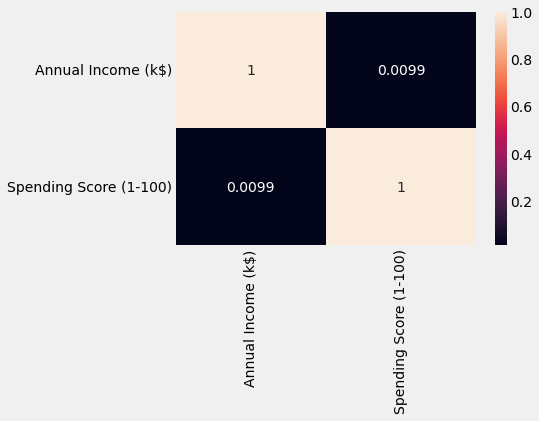

In [ ]:
#import seaborn as sns
import matplotlib.pyplot as plt
corrMatrix = Data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show() 

Checking the outliers 

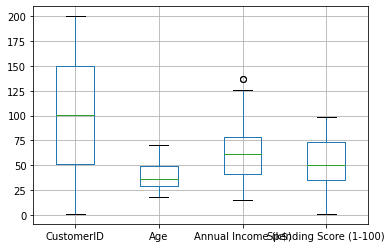

In [ ]:
Data.boxplot()


So, There is only one outlier present in Annual income attribute and all other attribute dosn't posses any outlier .

In [ ]:
n_data=Data.drop(Data.columns[[-5, -4, -3]], axis = 1, inplace = True)

Ploting Histogram gives an indication of the "shape" of the data - is it skewed or symmetric  etc.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


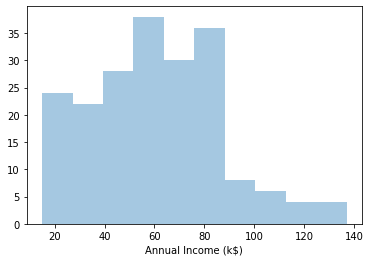

In [ ]:
sns.distplot(Data["Annual Income (k$)"], kde=False, bins=10);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


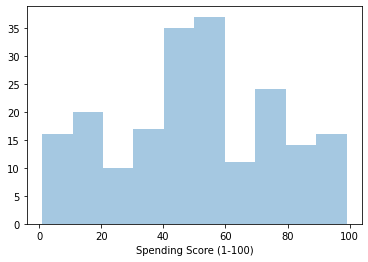

In [ ]:
sns.distplot(Data["Spending Score (1-100)"], kde=False, bins=10);

In [ ]:
Data.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

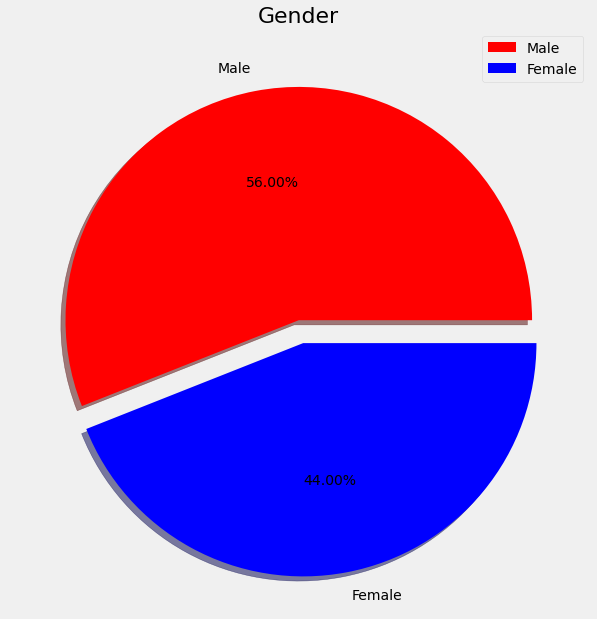

In [ ]:
plt.style.use('fivethirtyeight')

genders = ['Male', 'Female']
size = Data['Genre'].value_counts()
my_colors = ['red', 'blue']
exp = [0, 0.1]

fig = plt.figure(figsize = (20, 10))
plt.pie(size, labels = genders, colors = my_colors, explode = exp, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 22)
plt.legend()

plt.show()

Scatter plot for finding the Correlation between two variables

<function matplotlib.pyplot.show>

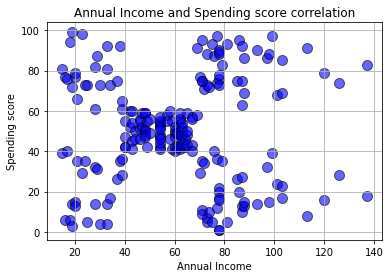

In [ ]:
plt.plot(figsize=(20,12))
plt.scatter(Data["Annual Income (k$)"], Data["Spending Score (1-100)"], color='blue', edgecolor='k', alpha=0.6, s=100)
plt.title("Annual Income and Spending score correlation")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.grid(True)
plt.show

Here, we can see that there is no relationship between the Annual Income and spending score correlation

<function matplotlib.pyplot.show>

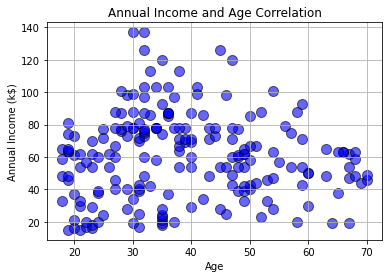

In [ ]:
plt.plot(figsize=(20,12))
plt.scatter(Data["Age"], Data["Annual Income (k$)"], color='blue', edgecolor='k', alpha=0.6, s=100)
plt.title("Annual Income and Age Correlation")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.grid(True)
plt.show

There is no correlation or very weak negatively Correlation between Age and Annual income .

<function matplotlib.pyplot.show>

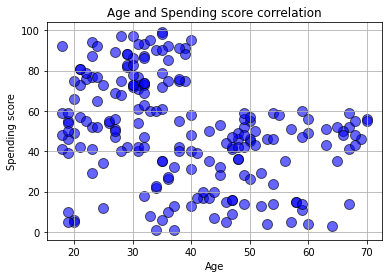

In [ ]:
plt.plot(figsize=(24,12))
plt.scatter(Data["Age"], Data["Spending Score (1-100)"], color='blue', edgecolor='k', alpha=0.6, s=100)
plt.title("Age and Spending score correlation")
plt.xlabel("Age")
plt.ylabel("Spending score")
plt.grid(True)
plt.show

There is no correlation or very weak negatively Correlation between Age and spending score .

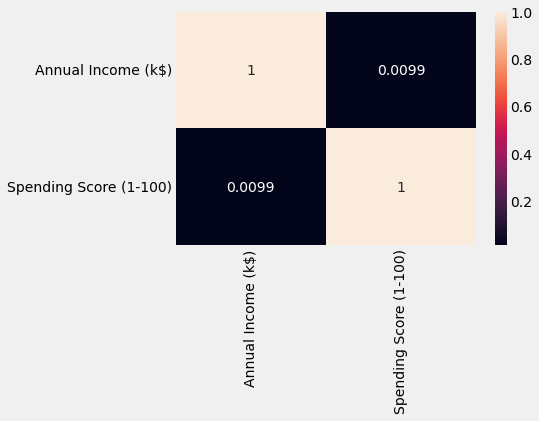

In [ ]:
import matplotlib.pyplot as plt
import time
corrMatrix = Data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
Data.head(5)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
from scipy.stats import pearsonr

In [ ]:
corr, _ = pearsonr(Data["Annual Income (k$)"], Data["Spending Score (1-100)"])
print('Pearsons correlation: %.3f' % corr)
 



Pearsons correlation: 0.010


So,these two Attributes are not correlated.

In [ ]:
Data[-10:]

,Annual Income (k$),Spending Score (1-100)
190,103,23
191,103,69
192,113,8
193,113,91
194,120,16
195,120,79
196,126,28
197,126,74
198,137,18
199,137,83


 ## K means clustering Algorithm ( PARTITION BASED CLUSTERING )

First Finding the optimal Number of K values

[269981.28, 183116.4295463669, 106348.37306211122]


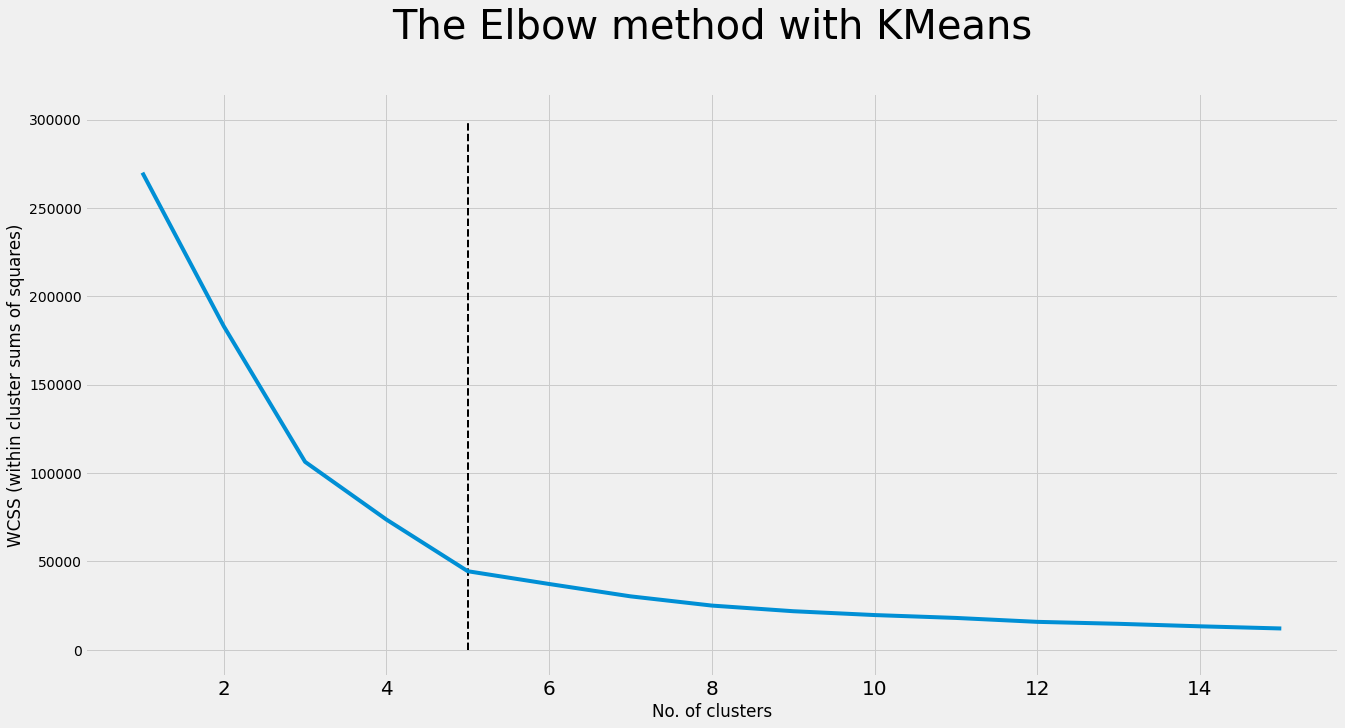

In [ ]:
from sklearn.cluster import KMeans
inertia = []
for x in range(1,16):
    kmeans = KMeans(n_clusters=x, init='k-means++')
    kmeans.fit(Data)
    inertia.append(kmeans.inertia_)
print(inertia[:3])
with plt.style.context(('fivethirtyeight')):   #To set background style of plot
    plt.figure(figsize=(20,10))
    plt.plot(range(1,16),inertia)
    plt.title("The Elbow method with KMeans\n", fontsize=40)
    plt.xlabel("No. of clusters")
    plt.ylabel("WCSS (within cluster sums of squares)")
    plt.xticks(fontsize=20)
    
    plt.vlines(x=5, ymin=0, ymax=300000, linestyle="--", color="black", lw=2)
    
   # plt.text(x=5.2, y=110000, s="Optimal number of clusters is 5", fontsize=25)
    
    plt.show()

In,the above graph We can easily see  that there is a sharpe change at K=5 ,so according to elbow algorithm our Optimal K value is 5 .

K-means Clustering algorithm is basically a partition technique algorithm which main aim is to reduce to the 
distance b/w the cluster centroid  according to their similar properties and data points and increases the inter cluster distance . The wcss function is bound to convert to local minima .   

In [ ]:
# Kmeans clustering algorithm gives better result for dataset which are distinct or well separated to each other .
# kmeans doesnot robust to the noisy data points .
# It is applicale only for those data set or attributes for which mean is defined .
# Doesnot applicable for categorical or nominal data. 
# Only local optima can found . May not sure about Global optima .
# class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')[
# n_clusters  is predifened number of clusters value .if we don't initialize this value then by Defalut K will be 8.

 Understanding the parameters of sklearn kmaens clustering algorithm 
 class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')

   1). n_clusters  is predifened number of clusters    value .if we don't initialize this value then by Defalut K will be 8.

   2). init  is for Centroid Initialization 
        init{‘k-means++’, ‘random’, ndarray, callable}, default=’k-means++’

        k-means++ -  As spreading out the initial centroids is thought to be a worthy goal, k-means++ pursues this by assigning the first centroid to the location of a randomly selected data point, and then choosing the subsequent centroids from the remaining data points based on a probability proportional to the squared distance away from a given point's nearest existing centroid. 

        The effect is an attempt to push the centroids as far from one another as possible, covering as much of the occupied data space as they can from initialization.
   Random : Randomly pick K data point and Used as Initial Centroids . 

   If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.


3). n_init : int, default=10
Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

In K-means the initial placement of centroid plays a very important role in it's convergence. Sometimes, the initial centroids are placed in a such a way that during consecutive iterations of K-means the clusters the clusters keep on changing drastically and even before the convergence condition may occur, max_iter is reached and we are left with incorrect cluster.

 Hence, the clusters obtained in such may not be correct. To overcome this problem, this parameter is introduced. The value of n_iter basically determines how many different sets of randomly chosen centroids, should the algorithm use.
 
  For each different set of points, a comparision is made about how much distance did the clusters move, i.e. if the clusters travelled small distances than it is highly likely that we are closest to ground truth/best solution. The points which provide the best performance and their respective run along with all the cluster labels are returned.

4). max_iter : int, default=300
Maximum number of iterations of the k-means algorithm for a single run.


In [ ]:
Data[:-10]
D=Data.values
D[:-10]

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
#X = D.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']]
D.dtype

dtype('int64')

Applying Kmeans 

In [ ]:
from sklearn.cluster import KMeans
start = time.time()
kmeans = KMeans(n_clusters=5, random_state=42,max_iter=1000).fit(D)
y_kmeans = kmeans.fit_predict(D) # predict the each sample to it closest custer
print(y_kmeans[0:])
end = time.time()
print("THE TIME TAKEN FOR 1000 ITERATIONS TAKEN BY KMEANS ALGORITHM IS :-" ,end - start)
y_pred=kmeans.predict([[100,30]])
print(y_pred)
y_pred1=kmeans.predict([[19,42]])
print(y_pred1)
#y_pred(D[0:2]) # This customer his annual Income (k$) is 100 and his spending score is 30

THE TIME TAKEN FOR 1000 ITERATIONS TAKEN BY KMEANS ALGORITHM IS :- 0.0746004581451416
[1]
[2]


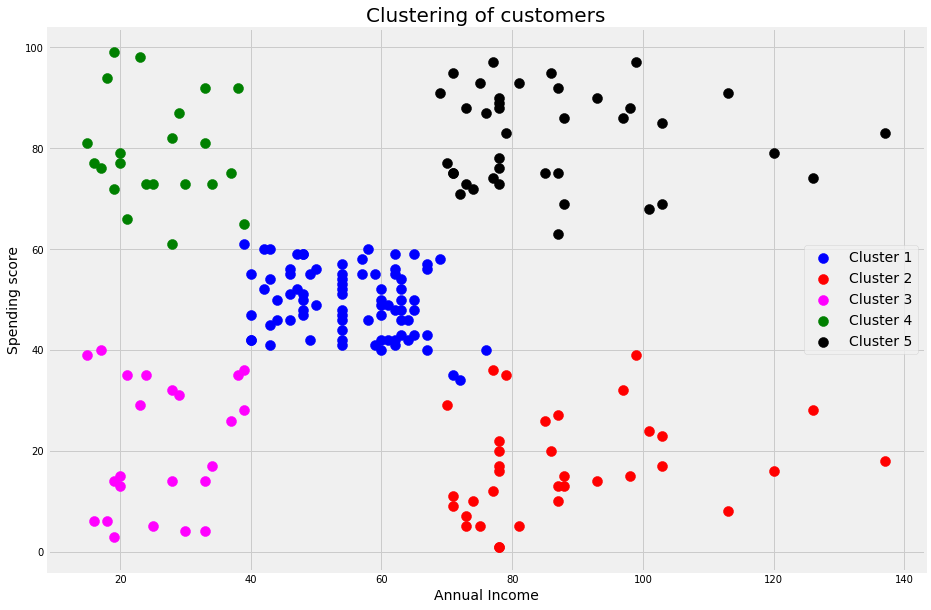

In [ ]:
plt.figure(figsize=(14,10))
plt.scatter(D[y_kmeans == 0, 0], D[y_kmeans == 0, 1], s=100, c='blue',label ='Cluster 1')
plt.scatter(D[y_kmeans == 1, 0], D[y_kmeans == 1, 1], s=100, c='red',label ='Cluster 2')
plt.scatter(D[y_kmeans == 2, 0], D[y_kmeans == 2, 1], s=100, c='magenta',label ='Cluster 3')
plt.scatter(D[y_kmeans == 3, 0], D[ y_kmeans== 3, 1], s=100, c='green',label ='Cluster 4')
plt.scatter(D[y_kmeans == 4, 0], D[y_kmeans == 4, 1], s=100, c='black',label ='Cluster 5')

plt.title("Clustering of customers", fontsize=20)
plt.xlabel("Annual Income", fontsize=14)
plt.ylabel("Spending score", fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)



plt.show()

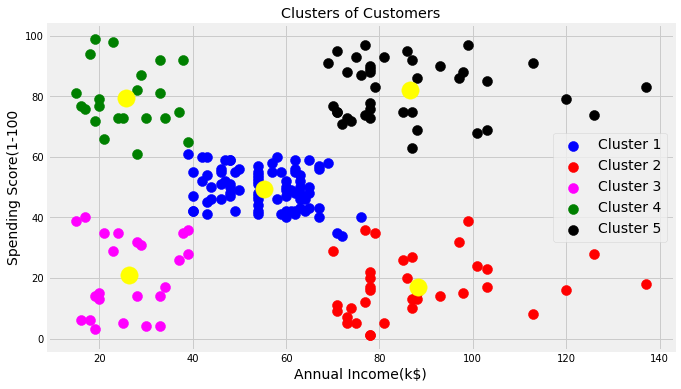

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(D[y_kmeans == 0, 0], D[y_kmeans == 0, 1], s=100, c='blue',label ='Cluster 1')
plt.scatter(D[y_kmeans == 1, 0], D[y_kmeans == 1, 1], s=100, c='red',label ='Cluster 2')
plt.scatter(D[y_kmeans == 2, 0], D[y_kmeans == 2, 1], s=100, c='magenta',label ='Cluster 3')
plt.scatter(D[y_kmeans == 3, 0], D[ y_kmeans== 3, 1], s=100, c='green',label ='Cluster 4')
plt.scatter(D[y_kmeans == 4, 0], D[y_kmeans == 4, 1], s=100, c='black',label ='Cluster 5')

plt.title("Clustering of customers", fontsize=20)
plt.xlabel("Annual Income", fontsize=14)
plt.ylabel("Spending score", fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

ANALYSING WITH JUST CHANGING THE MAXIMUM ITERATION

In [ ]:
import time

start = time.time()
kmeans_1 = KMeans(n_clusters=5, random_state=None).fit(D)
y_kmeans_1 = kmeans_1.fit_predict(D) # predict the each sample to it closest custer
print(y_kmeans_1[0:])
end = time.time()
print("THE TIME TAKEN FOR 300 ITERATIONS TAKEN BY KMEANS ALGORITHM IS :-" ,end - start)
y_kmeans_1=np.array(y_kmeans_1)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 2 3 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 4 0 2 0 4 0 4 0 2 0 4 0 4 0 4 0 4 0 2 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0]
THE TIME TAKEN FOR 300 ITERATIONS TAKEN BY KMEANS ALGORITHM IS :- 0.07494807243347168


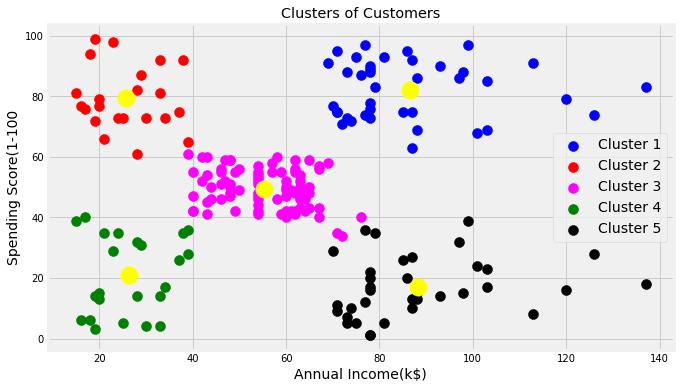

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(D[y_kmeans_1 == 0, 0], D[y_kmeans_1 == 0, 1], s=100, c='blue',label ='Cluster 1')
plt.scatter(D[y_kmeans_1 == 1, 0], D[y_kmeans_1 == 1, 1], s=100, c='red',label ='Cluster 2')
plt.scatter(D[y_kmeans_1 == 2, 0], D[y_kmeans_1 == 2, 1], s=100, c='magenta',label ='Cluster 3')
plt.scatter(D[y_kmeans_1 == 3, 0], D[ y_kmeans_1== 3, 1], s=100, c='green',label ='Cluster 4')
plt.scatter(D[y_kmeans_1 == 4, 0], D[y_kmeans_1 == 4, 1], s=100, c='black',label ='Cluster 5')

plt.title("Clustering of customers", fontsize=20)
plt.xlabel("Annual Income", fontsize=14)
plt.ylabel("Spending score", fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)
plt.scatter(kmeans_1.cluster_centers_[:, 0], kmeans_1.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

targetable_coustmer_group = High income, low spender --> 5

Standard = Middle income, middle spender --> 3

Royal_coustmer= Middle to high income and high spender --> 1 (Give some Special Discount To them ).

Careless = low income but high spender (should be avoided due to credit risk) --> 2

Sensible = low income , low spender --> 4


Initialising centroids by Random technique

In [ ]:
import time

start = time.time()
kmeans_2 = KMeans(n_clusters=5, random_state=None,init='random',max_iter=150).fit(D)
y_kmeans_2 = kmeans_2.fit_predict(D) # predict the each sample to it closest custer
print(y_kmeans_2[0:])
end = time.time()
print("THE TIME TAKEN FOR 150 ITERATIONS TAKEN BY KMEANS ALGORITHM IS :-" ,end - start)

y_kmeans_2=np.array(y_kmeans_2)
y_kmeans_2


[1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 3 1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 0 4 0 3 0 4 0 4 0 3 0 4 0 4 0 4 0 4 0 3 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0]
THE TIME TAKEN FOR 150 ITERATIONS TAKEN BY KMEANS ALGORITHM IS :- 0.07959413528442383


array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3,
       1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 4, 0, 3, 0, 4, 0, 4, 0,
       3, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0], dtype=int32)

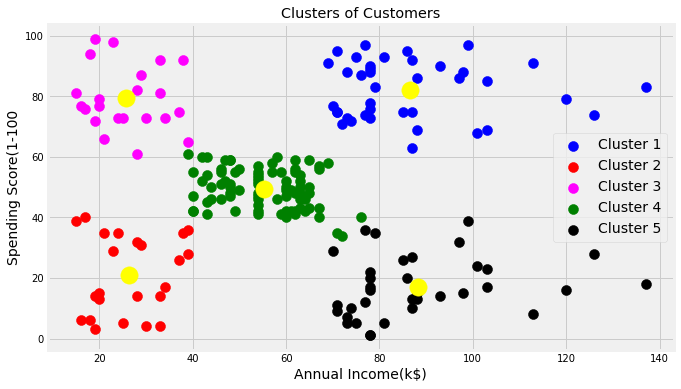

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(D[y_kmeans_2 == 0, 0], D[y_kmeans_2 == 0, 1], s=100, c='blue',label ='Cluster 1')
plt.scatter(D[y_kmeans_2 == 1, 0], D[y_kmeans_2 == 1, 1], s=100, c='red',label ='Cluster 2')
plt.scatter(D[y_kmeans_2 == 2, 0], D[y_kmeans_2 == 2, 1], s=100, c='magenta',label ='Cluster 3')
plt.scatter(D[y_kmeans_2 == 3, 0], D[ y_kmeans_2== 3, 1], s=100, c='green',label ='Cluster 4')
plt.scatter(D[y_kmeans_2 == 4, 0], D[y_kmeans_2 == 4, 1], s=100, c='black',label ='Cluster 5')

plt.title("Clustering of customers", fontsize=20)
plt.xlabel("Annual Income", fontsize=14)
plt.ylabel("Spending score", fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)
plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

Comparision between mini batch kmeans and Kmeans clustering algorithm 

In [ ]:
#K-means is one of the most popular clustering algorithms, mainly because of its good time performance.
# With the increasing size of the datasets being analyzed, the computation time of K-means increases because of its constraint of needing the whole dataset in main memory. For this reason, several methods have been proposed to reduce the temporal and spatial cost of the algorithm.
# A different approach is the Mini batch K-means algorithm.
# The mini batch K-means is faster but gives slightly different results than the normal batch K-means .
# when we have the large dataset we can use mini batch byt it may not give the optimal solution .
# Because It randomly takes the data as a batch (1024 by default in Sklearn)and sometimes it may happened that data in the batch didnot converges because we are taking this data randomly .
# what is the meaning of shuffle  in ML algorithms ?
# answer:- Before the trainig of data we shuffle the data for reasons like to remove the bias from the data .
# Take a example of house price prediction ,we might have all the smaller apartments at top and 
# at last Larger apartments . so,we don't shuffle the data  and try to fit up the model on the original data
#It means we are trainig the model for smaller data and trying to predict the model for larger values.
# It will decrease the accuracy of the model .
# Random state is used to give the same train and test data every time we make a split .if we don't use the random state
# then every time we get different data set for train and test and this will not help us in debugging a model .


In [ ]:
# Disadvantage of kmeans
# K-Means forms spherical clusters only. 
#This algorithm fails when data is not spherical ( i.e. same variance in all directions). 

## HIERARCHICAL CLUSTERING (HC)

Types of HC 
    1>-Agglomerative (Bottom up)
    2>-Divisive (Top down)

In [ ]:
# Agglomerative clustering , this algorithm builts the Dendogram (Tree) from the  bottom level and merge the most 
# similar (or Nearest pair) of clusters and stops when all the clusters merged into a single clusters .
# Suppose at initial point of time We have "M" objects and we take every object is a cluster of its own .
# Then we find the distance between the each pair of clusters and merged those clusters which is closest to each other.
# so,in the next step we have (M-1)  cluster and in the same way we find the closest Distance clusters and merge them and we have(M-2) clusters .
#Like this We go and merge all clusters until we get root(i.e a singal clusters).  




In [ ]:
# Divisive(Top- Down):- It starts with all data points in one clusters i.e- root .
# Splits the root into  the set of child clusters .Each child cluster is recursively Divided further .
# Stops when we have only singleton clusters of individual data points remian i.e: ,each cluster with a single  with a single data point .  

AGGLOMERATIVE CLUSTERING

In [ ]:
# In this algorithm we need not to be decide the number og clusters a priory .
# We can construct the Dendogram and cut it at desired level to get the number of clusters that we require .


How To Measure the Similarity Between two Clusters ?
 -> Single link distance between the clusters Ci and Cj is the minimum distance between any object in Ci and Cj.
   
   Similarity(Ci,Cj)=Max sim(x,y) x belongs to Ci and y Cj y belongs Cj .

   -> Complete link Method - In this method  the distance between two Farthest points in the two clusters .
     
     Sim(Ci,Cj) = Min Sim(x,y)  where X belongs to the x belongs to the Ci and Y belongs to the Cj .  


Optical number of customers 

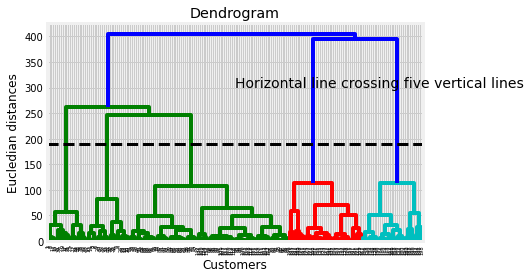

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sc
sc.dendrogram(sc.linkage(D, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eucledian distances")
plt.hlines(y=190,xmin=0 , xmax=2000, lw=3, linestyles="--", color='black')
plt.text(x=1000, y=300, s="Horizontal line crossing five vertical lines", fontsize=14)
plt.show()

Optimal number of cluster is 5 .

In [ ]:
from sklearn.cluster import AgglomerativeClustering
AGM = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single') .fit(D)
# n_clusters=by default =2
#linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’
# ‘ward’ minimizes the variance of the clusters being merged.
#‘average’ uses the average of the distances of each observation of the two sets.
#‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.
#‘single’ uses the minimum of the distances between all observations of the two sets.
# The linkage criterion determin es which distance to use between sets of observation. 
#The algorithm will merge the pairs of cluster that minimize this criterion.

In [ ]:
y_agm = AGM.fit_predict(D)
print(y_agm)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 4 0 4 3 2]


No handles with labels found to put in legend.


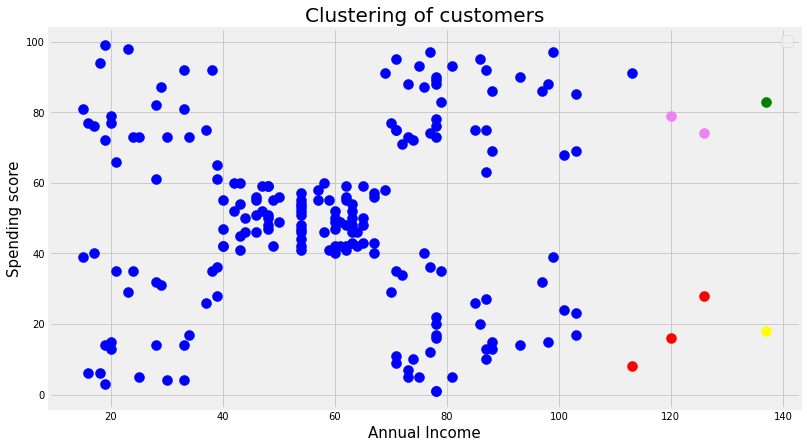

In [ ]:
plt.figure(figsize=(12,7))
plt.scatter(D[y_agm == 0, 0], D[y_agm == 0, 1], s=100, c='red')
plt.scatter(D[y_agm == 1, 0], D[y_agm == 1, 1], s=100, c='blue')
plt.scatter(D[y_agm == 2, 0], D[y_agm == 2, 1], s=100, c='green')
plt.scatter(D[y_agm == 3, 0], D[y_agm == 3, 1], s=100, c='yellow')
plt.scatter(D[y_agm == 4, 0], D[y_agm == 4, 1], s=100, c='violet')
plt.grid(True)
plt.title("Clustering of customers", fontsize=20)
plt.xlabel("Annual Income", fontsize=15)
plt.ylabel("Spending score", fontsize=15)
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

# Linkage="Ward"

In [ ]:
from sklearn.cluster import AgglomerativeClustering
AGM_1 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward') .fit(D)
# Ward linkage minimizes the variance between clusters which is going to merged .
y_agm_1 = AGM_1.fit_predict(D)
print(y_agm_1)


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


No handles with labels found to put in legend.


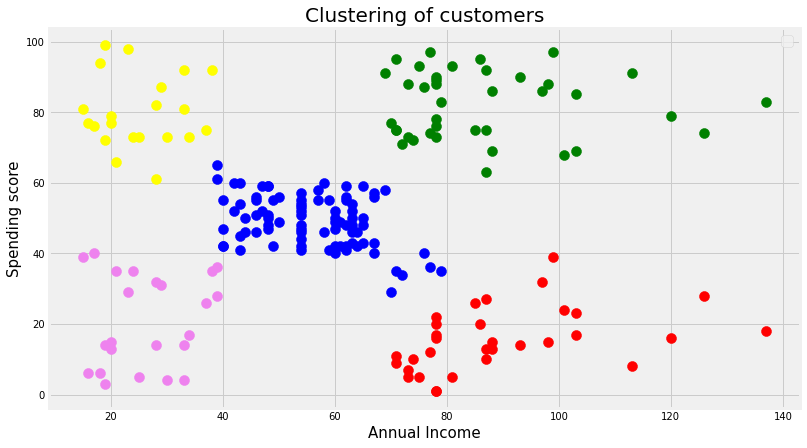

In [ ]:
plt.figure(figsize=(12,7))
plt.scatter(D[y_agm_1 == 0, 0], D[y_agm_1 == 0, 1], s=100, c='red')
plt.scatter(D[y_agm_1 == 1, 0], D[y_agm_1 == 1, 1], s=100, c='blue')
plt.scatter(D[y_agm_1== 2, 0], D[y_agm_1 == 2, 1], s=100, c='green')
plt.scatter(D[y_agm_1 == 3, 0], D[y_agm_1 == 3, 1], s=100, c='yellow')
plt.scatter(D[y_agm_1 == 4, 0], D[y_agm_1 == 4, 1], s=100, c='violet')

plt.title("Clustering of customers", fontsize=20)
plt.xlabel("Annual Income", fontsize=15)
plt.ylabel("Spending score", fontsize=15)
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

Conclusion is that We can use ward beacuse it classifies better than the maximum .

## DENSITY BASED ALGORITHM  

Density Based Spatial Clustering of Applications with Noise   (DBSCAN)

In [ ]:
# algorithm
# Find all the neighbor points within eps and identify the core points or visited with more than MinPts neighbors.
#For each core point if it is not already assigned to a cluster, create a new cluster.
#Find recursively all its density connected points and assign them to the same cluster as the core point. 
# A point a and b are said to be density connected if there exist a point c which has a sufficient number of points in its neighbors and both the points a and b are within the eps distance. This is a chaining process. So, if b is neighbor of c, c is neighbor of d, d is neighbor of e, which in turn is neighbor of a implies that b is neighbor of a.
#Iterate through the remaining unvisited points in the dataset. 
#Those points that do not belong to any cluster are noise.
# It is somewhat similar to K nearest beighbour for finding to compute point wise distance and find nieghbours.


In [ ]:
# Core Point: A point is a core point if it has more than MinPts points within eps. 
#Border Point: A point which has fewer than MinPts within eps but it is in the neighborhood of a core point. 
# Noise or outlier: A point which is not a core point or border point.

In [ ]:
# skleran parametrs for DBSCAn
# class sklearn.cluster.DBSCAN(eps=0.5 default, *, min_samples=5- default , metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
#

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=3, min_samples=4).fit(D)
y_db = clustering.fit_predict(D)
print(y_db)
np.unique(y_db)


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0 -1 -1  0 -1  0 -1  0  0 -1  0 -1 -1
  0 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  2  1  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  2  3
  3 -1  3 -1 -1  4 -1 -1 -1  4  5  4 -1  4  5 -1  5  4 -1  4  5 -1 -1  6
 -1 -1 -1  7 -1  6 -1  6 -1  7 -1  6 -1  7 -1  7 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  8 -1  8 -1  8 -1  8 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8])

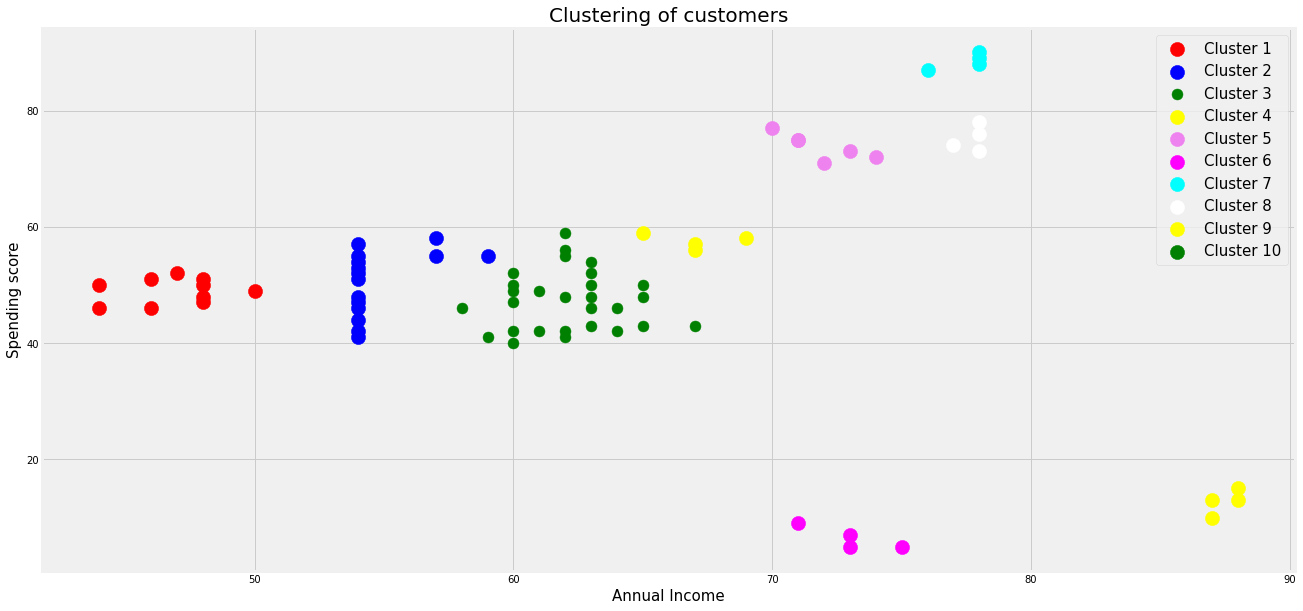

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(D[y_db == 0, 0], D[y_db == 0, 1], s=200, c='red',label ='Cluster 1')
plt.scatter(D[y_db == 1, 0], D[y_db == 1, 1], s=200, c='blue',label ='Cluster 2')
plt.scatter(D[y_db==  2, 0], D[y_db == 2, 1], s=120, c='green',label ='Cluster 3')
plt.scatter(D[y_db == 3, 0], D[y_db == 3, 1], s=200, c='yellow',label ='Cluster 4')
plt.scatter(D[y_db == 4, 0], D[y_db == 4, 1], s=200, c='violet',label ='Cluster 5')
plt.scatter(D[y_db == 5, 0], D[y_db == 5, 1], s=200, c='magenta',label ='Cluster 6')
plt.scatter(D[y_db == 6, 0], D[y_db == 6, 1], s=200, c='cyan',label ='Cluster 7')
plt.scatter(D[y_db==  7, 0], D[y_db == 7, 1], s=200, c='white',label ='Cluster 8')
plt.scatter(D[y_db == 8, 0], D[y_db == 8, 1], s=200, c='yellow',label ='Cluster 9')
plt.scatter(D[y_db == 9, 0], D[y_db == 9, 1], s=200, c='green',label ='Cluster 10')

plt.title("Clustering of customers", fontsize=20)
plt.xlabel("Annual Income", fontsize=15)
plt.ylabel("Spending score", fontsize=15)
plt.legend(fontsize=15)
plt.grid(True)
plt.show()